In [2730]:
# Importing some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [2731]:
## Reading the files
train_df = pd.read_csv('train_ml.csv', index_col=0)
test_df = pd.read_csv('test_ml.csv', index_col=0)

In [2732]:
train_df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1


In [2733]:
import re

In [2734]:
train_df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1


In [2735]:
test_df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,"Thu, 13 Jul 2017 08:55:57 +0000",twitter,com,0,0,multipart/alternative,7,56,0,0,67.0,36243
1,"Sun, 30 Sep 2018 14:42:12 +0000",mailer,netflix.com,0,0,multipart/alternative,5,33,0,0,27.0,27015
2,"Mon, 13 Feb 2017 10:47:00 +0530",iiitd,ac.in,0,0,text/plain,0,2,1,0,22.0,788
3,"Thu, 16 Jun 2016 09:56:23 +0000",twitter,com,0,0,multipart/alternative,8,53,0,0,79.0,39504
4,"Mon, 18 Apr 2016 01:51:59 +0530",iiitd,ac.in,0,0,multipart/mixed,0,0,0,0,24.0,178773


In [2736]:
train_df.describe()

,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
count,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39660.000000,3.967100e+04,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000,39671.000000
mean,0.378967,0.002974,9.806332,36.731088,0.395755,0.102317,51.442032,2.321781e+05,0.362406,0.809609,0.199768,0.155807,0.008293,0.002521,0.003832,0.100955
std,2.530353,0.054458,440.393286,144.379127,0.489018,0.303068,34.142227,2.251044e+06,0.480701,0.392614,0.399831,0.362676,0.090690,0.050144,0.061781,0.301273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,31.000000,4.903000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,18.000000,0.000000,0.000000,43.000000,2.000500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,9.000000,47.000000,1.000000,0.000000,63.000000,4.800100e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,155.000000,1.000000,83480.000000,21540.000000,1.000000,1.000000,528.000000,7.438108e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2737]:
train_df.groupby(['tld','org'])[['updates','personal','promotions','forums','purchases','travel','spam','social']].mean()

,,updates,personal,promotions,forums,purchases,travel,spam,social
tld,org,,,,,,,,
21cf.com,digital,0.500000,1.000000,0.500000,0.0,0.0,0.0,0.0,0.0
33mail.com,mailer1,1.000000,0.058824,0.000000,0.0,0.0,0.0,0.0,0.0
4shared.com,mx2,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Apple.com,InsideApple,0.545455,0.818182,0.454545,0.0,0.0,0.0,0.0,0.0
BRASSRING.COM,TRM,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
wix.com,i,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
xerox.com,xrce,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
xoom.com,messages,0.900000,0.733333,0.466667,0.0,0.0,0.0,0.0,0.0


In [2738]:
train_df.shape

(39671, 20)

In [2739]:
train_df.dtypes.value_counts()

int64      15
object      4
float64     1
dtype: int64

In [2740]:
train_df.dtypes

date                 object
org                  object
tld                  object
ccs                   int64
bcced                 int64
mail_type            object
images                int64
urls                  int64
salutations           int64
designation           int64
chars_in_subject    float64
chars_in_body         int64
updates               int64
personal              int64
promotions            int64
forums                int64
purchases             int64
travel                int64
spam                  int64
social                int64
dtype: object

In [2741]:
def split_X_y(Xa):
    return Xa.drop(['updates','personal','promotions','forums','purchases','travel','spam','social'],axis=1), Xa[['updates','personal','promotions','forums','purchases','travel','spam','social']]


In [2742]:
X,y=split_X_y(train_df.copy())

In [2743]:
columns=list(X.columns)
print(columns)

['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body']


In [2744]:
categorical_features=X.select_dtypes(include=['object','category']).columns.tolist()
numerical_features=X.select_dtypes(exclude=['object','category']).columns.tolist()

In [2745]:
print(' columns ', columns)
print('-------------')
print( 'categorical features', categorical_features)
print('-------------')
print('nulerical_features', numerical_features)

 columns  ['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body']
-------------
categorical features ['date', 'org', 'tld', 'mail_type']
-------------
nulerical_features ['ccs', 'bcced', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body']


In [2746]:
for col in categorical_features:
    print(col,'\n','****************','\n',X[col].value_counts())
    print('*****************************')

date 
 **************** 
 Sat, 04 May 2019 18:17:01 -0700          13
Tue, 22 Sep 2020 03:28:22 -0700          12
Tue, 04 Jun 2019 05:05:20 -0700          12
Sun, 03 Nov 2019 08:51:24 -0800          12
Sat, 06 Jun 2020 08:09:28 -0700          11
                                         ..
Sun, 2 Oct 2016 16:26:10 +0000            1
Fri, 20 Sep 2019 03:39:01 -0700 (PDT)     1
Wed, 19 Jun 2019 04:35:39 +0000           1
Wed, 21 Dec 2016 12:24:34 +0530           1
Tue, 19 Dec 2017 21:11:28 +0000           1
Name: date, Length: 38122, dtype: int64
*****************************
org 
 **************** 
 iiitd          8934
google         2201
usebackpack    1699
amazon         1523
quora          1241
               ... 
cmrjournal        1
aryaemailer       1
crimson           1
is                1
spgjedu           1
Name: org, Length: 973, dtype: int64
*****************************
tld 
 **************** 
 com               17682
ac.in              8996
in                 1818
org        

In [2747]:
for col in columns:
    print(col,'----------------',X[col].isnull().sum())

date ---------------- 0
org ---------------- 1677
tld ---------------- 1679
ccs ---------------- 0
bcced ---------------- 0
mail_type ---------------- 98
images ---------------- 0
urls ---------------- 0
salutations ---------------- 0
designation ---------------- 0
chars_in_subject ---------------- 11
chars_in_body ---------------- 0


In [2748]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder

In [2749]:
## PREPROCESSING

# Changing  mail_type columns in more columns
mail_type=train_df['mail_type'].unique().tolist()

M=[]
for l in mail_type:
    a="".join(str(l).split(" ")).lower()
    M+=(a.split('/'))
keys=set(M)
    

# put all the strings in lower case
def standardisation(data):
    for col in data.select_dtypes(include=['object','category']).columns.tolist():
        data[col]=data[col].str.lower()



    
def new_variables(data):
    m=data.shape[0]
    #L=train_df['mail_type'].unique().tolist()
   
    #print(keys)
    newColumns={}
    for key in keys:
        temp=[]
        for i in range(m):
            if key in list( "".join(str(data['mail_type'].iloc[i]).split(" ")).split('/')):
                temp.append(1)
            else:
                temp.append(0)
        newColumns[key]= temp
    for key in newColumns.keys():
        data[key]=newColumns[key]
        
    

In [2750]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Sep','Oct','Nov','Dec']
def day_parse(L):
    for day in days:
        if day in L:
            return day
   
    
def month_parse(L):
    for month in months:
        if month in L:
            return month

    
def time_parse(L):
    M="".join(L.split(" "))
    plus=0;minus=0
    for i in range(len(M)):
        if M[i]==':':
            a=i
        if M[i]=='+' and (M[i-1] in ['0','1','2','3','4','5','6','7','8','9']) and (M[i+1] in ['0','1','2','3','4','5','6','7','8','9']):
            plus=i
        if M[i]=='-' and (M[i-1] in ['0','1','2','3','4','5','6','7','8','9']) and (M[i+1] in ['0','1','2','3','4','5','6','7','8','9']):
            minus=i

        
        
    #a=L.find(':')
    #print(L[a-2:a]+L[a+1:a+3])
    time1=int(M[a-2:a]+M[a+1:a+3])
    
    
    if plus!=0:
        time2=int(M[plus+1:plus+5])
        time=(time1+time2)%2400
    elif minus!=0:
        #print(L)
        time2=int(M[minus+1:minus+5])
        time=(time1-time2)%2400
    elif plus==0 and minus==0:
        time=time1
        
    return time

def year_parse(L):
    M=" ".join(L.split(" "))
    #print(M)
    try :
        return int(re.findall('[0-9][0-9][0-9][0-9]',M)[0])
    except:
        return np.nan
    

def number_date_parse(L):
    M=" ".join(L.split(" "))
    #print(M)
    try :
        return int(re.findall('[0-9][0-9]',M)[0])
    except:
        return np.nan

In [2751]:
def date_process(data1):
    data=data1.copy()
    data['day']=data['date'].apply(day_parse)
    data['month']=data['date'].apply(month_parse)
    data['time']=data['date'].apply(time_parse)
    data['year']=data['date'].apply(year_parse)
    data['number_date']=data['date'].apply(number_date_parse)
    return data

In [2752]:
## Date preprocessing
X=date_process(X)

In [2753]:
# Dummies creation
def create_dummies(data):
    return pd.get_dummies(data, columns=['month','day'], prefix='', prefix_sep='')
    

In [2754]:
X=create_dummies(X)

In [2755]:
def ratio_features(data):
    data['urls_ratio']=data['urls']/data['chars_in_body']
    data['images_ratio']=data['images']/data['chars_in_body']
    data['chars_in_subject_ratio']=data['chars_in_subject']/data['chars_in_body']
    
    

In [2756]:
#ratio_features(X)

In [2757]:
X.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,...,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,...,0,1,0,0,1,0,0,0,0,0
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,...,0,1,0,1,0,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2758]:
#Strings in lower case
standardisation(X)

print(X['mail_type'].value_counts())

multipart/alternative    28196
text/html                 5595
multipart/mixed           3405
text/plain                1397
multipart/related          902
text/html                   40
multipart/signed            23
multipart/report            12
text/calendar                2
multipart/idm                1
Name: mail_type, dtype: int64


In [2759]:
# Changing  mail_type columns in more columns
new_variables(X)

In [2760]:
X.shape

(39671, 45)

In [2761]:
# Dropping useless features

def dropping(data, cols=['date','mail_type','org','tld','nan']):
    data.drop(cols, axis=1,inplace=True)
dropping(X,['date','mail_type'])

In [2762]:
X.head()

,org,tld,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,...,signed,html,idm,calendar,alternative,related,text,nan,multipart,mixed
0,researchgatemail,net,0,0,4,28,0,1,47.0,25556,...,0,0,0,0,1,0,0,0,1,0
1,no-ip,com,0,0,6,32,0,0,46.0,19930,...,0,0,0,0,1,0,0,0,1,0
2,mail,goodreads.com,0,0,0,0,0,0,21.0,4,...,0,0,0,0,0,0,0,0,1,1
3,insideapple,apple.com,0,0,108,171,0,0,52.0,96568,...,0,0,0,0,1,0,0,0,1,0
4,twitter,com,0,0,20,166,0,0,81.0,95131,...,0,0,0,0,1,0,0,0,1,0


In [2763]:
X.columns

Index(['org', 'tld', 'ccs', 'bcced', 'images', 'urls', 'salutations',
       'designation', 'chars_in_subject', 'chars_in_body', 'time', 'year',
       'number_date', 'Apr', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'report', 'plain', 'signed', 'html', 'idm', 'calendar', 'alternative',
       'related', 'text', 'nan', 'multipart', 'mixed'],
      dtype='object')

In [2764]:
new_df=X.join(y)


In [2765]:
new_df.columns

Index(['org', 'tld', 'ccs', 'bcced', 'images', 'urls', 'salutations',
       'designation', 'chars_in_subject', 'chars_in_body', 'time', 'year',
       'number_date', 'Apr', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'report', 'plain', 'signed', 'html', 'idm', 'calendar', 'alternative',
       'related', 'text', 'nan', 'multipart', 'mixed', 'updates', 'personal',
       'promotions', 'forums', 'purchases', 'travel', 'spam', 'social'],
      dtype='object')

<AxesSubplot:>

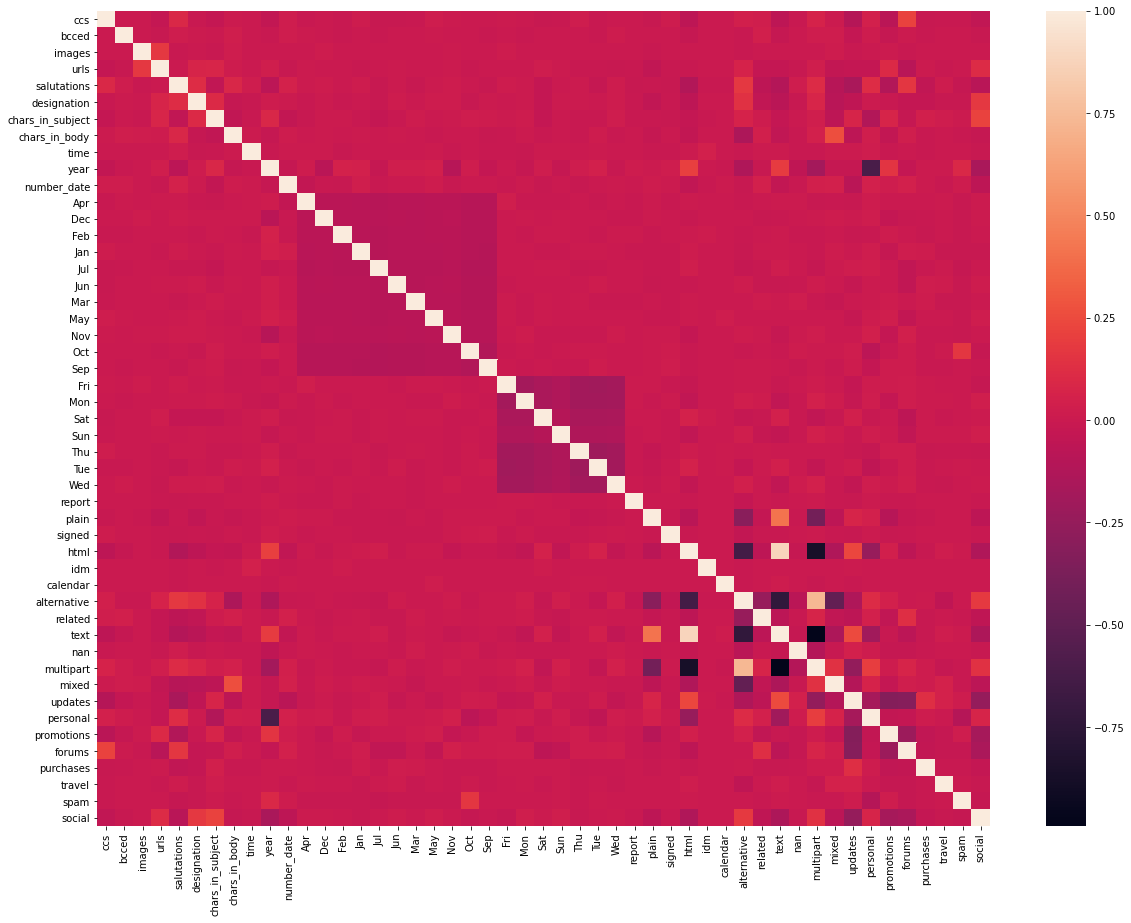

In [2766]:
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr())


>Threshold=0.00, Features=41
>Threshold=0.05, Features=33
>Threshold=0.10, Features=18
>Threshold=0.15, Features=10
>Threshold=0.20, Features=10
>Threshold=0.25, Features=8
>Threshold=0.30, Features=8
>Threshold=0.35, Features=8
>Threshold=0.40, Features=8
>Threshold=0.45, Features=8
>Threshold=0.50, Features=8
>Threshold=0.55, Features=8
>Threshold=0.60, Features=8
>Threshold=0.65, Features=8
>Threshold=0.70, Features=8
>Threshold=0.75, Features=8
>Threshold=0.80, Features=8
>Threshold=0.85, Features=8
>Threshold=0.90, Features=8
>Threshold=0.95, Features=8


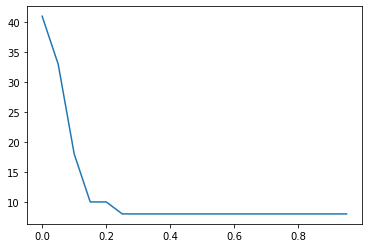

In [2767]:
from sklearn.feature_selection import VarianceThreshold

# define thresholds to check
thresholds = np.arange(0.0, 1, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X.select_dtypes(exclude=['object','category']))
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [2768]:
X.shape

(39671, 43)

In [2769]:
X_sel=X.copy()

In [2770]:
X.shape

(39671, 43)

In [2771]:
X_sel.shape

(39671, 43)

In [2772]:
X_sel.head()

,org,tld,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,...,signed,html,idm,calendar,alternative,related,text,nan,multipart,mixed
0,researchgatemail,net,0,0,4,28,0,1,47.0,25556,...,0,0,0,0,1,0,0,0,1,0
1,no-ip,com,0,0,6,32,0,0,46.0,19930,...,0,0,0,0,1,0,0,0,1,0
2,mail,goodreads.com,0,0,0,0,0,0,21.0,4,...,0,0,0,0,0,0,0,0,1,1
3,insideapple,apple.com,0,0,108,171,0,0,52.0,96568,...,0,0,0,0,1,0,0,0,1,0
4,twitter,com,0,0,20,166,0,0,81.0,95131,...,0,0,0,0,1,0,0,0,1,0


In [2848]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier,OutputCodeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, PowerTransformer, MaxAbsScaler,QuantileTransformer,Normalizer

In [2863]:
def impute():
    # Obtaining the new features
    categorical_features=X_sel.select_dtypes(include=['object','category']).columns.tolist()
    numerical_features=X_sel.select_dtypes(exclude=['object','category']).columns.tolist()
    
    # creating the pipeline of the prepocessing
    numerical_pipeline=Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),
                                       #('quadratic',PolynomialFeatures(2)),
                                         ('standard',RobustScaler()),
                                      ])

    categorical_pipeline=Pipeline(steps=[('imputation',SimpleImputer(strategy='most_frequent')),
                                         ('oneHotencode',OneHotEncoder(handle_unknown='ignore') ), ])

    preparation=ColumnTransformer(transformers=[('categorical',categorical_pipeline, categorical_features),
                                               ('numerical',numerical_pipeline,numerical_features)])
    
    model= Pipeline(steps=[('preparation', preparation),
                              ('model', OneVsRestClassifier(  BaggingClassifier( XGBClassifier(max_depth=9,
 min_child_weight=1,gamma=0.3, subsample=1, colsample_bytree=0.8,reg_alpha=0.01,learning_rate= 0.2,n_estimators= 300), n_estimators=10 )     ) )]) 
    return model


In [2864]:
# The best for the moment
#XGBClassifier(max_depth=9,
 #min_child_weight=1,gamma=0.3, subsample=1, colsample_bytree=0.8,reg_alpha=0.01,learning_rate= 0.2,n_estimators= 300) 

#OneVsRestClassifier(XGBClassifier( max_depth=9,
 #min_child_weight=1, gamma=0.3, subsample=1, colsample_bytree=0.8,reg_alpha=0.01,learning_rate= 0.2,n_estimators= 300)

#'model__estimator__max_depth': 6, 'model__estimator__learning_rate': 0.25, 'model__estimator__gamma': 0.1, 'model__estimator__colsample_bytree': 0.5

In [2865]:
model=impute()

In [2866]:
# Splitting in train and test set
X_train, X_test, y_train, y_test = train_test_split(X_sel, y)

In [2867]:
for col in X_train.columns:
    print(col,'----------------',X_train[col].isnull().sum())

org ---------------- 1221
tld ---------------- 1223
ccs ---------------- 0
bcced ---------------- 0
images ---------------- 0
urls ---------------- 0
salutations ---------------- 0
designation ---------------- 0
chars_in_subject ---------------- 7
chars_in_body ---------------- 0
time ---------------- 0
year ---------------- 1
number_date ---------------- 0
Apr ---------------- 0
Dec ---------------- 0
Feb ---------------- 0
Jan ---------------- 0
Jul ---------------- 0
Jun ---------------- 0
Mar ---------------- 0
May ---------------- 0
Nov ---------------- 0
Oct ---------------- 0
Sep ---------------- 0
Fri ---------------- 0
Mon ---------------- 0
Sat ---------------- 0
Sun ---------------- 0
Thu ---------------- 0
Tue ---------------- 0
Wed ---------------- 0
report ---------------- 0
plain ---------------- 0
signed ---------------- 0
html ---------------- 0
idm ---------------- 0
calendar ---------------- 0
alternative ---------------- 0
related ---------------- 0
text -----------

In [2868]:
model.fit(X_train, y_train)

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHotencode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['org', 'tld']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   RobustScaler())]),
                                          

In [2869]:
# Printing model score
print("Score du modèle : %.2f" % model.score(X_train, y_train))
print("Score du modèle : %.2f" % model.score(X_test, y_test))

Score du modèle : 0.94
Score du modèle : 0.86


In [2870]:
#Printing model log score 
print("Model log loss", log_loss(y_train,model.predict_proba(X_train)))
print("Model log loss", log_loss(y_test,model.predict_proba(X_test)))

Model log loss 1.008284170059657
Model log loss 1.139410303608365


In [2827]:

# Model selection
param_grid = {
    "model__estimator__base_estimator__criterion" : ["gini", "entropy"],
              "model__estimator__base_estimator__splitter" :   ["best", "random"],
              "model__estimator__n_estimators": [100, 200,300,400,500,1000,10000]
    }
p_test3 = {'model__estimator__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'model__estimator__n_estimators':[100,250,500,750,1000,1250,1500,1750]}

#grid_search = RandomizedSearchCV(estimator =model, param_grid = p_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

# on crée le modèle de grille
#grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
# on ajuste aux données d'apprentissage
#grid_search.fit(X_train, y_train)

#best_model=grid_search.best_estimator_

In [2783]:
#XGB TUNING

In [2784]:
from sklearn.metrics import log_loss
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [1994]:
#print(clf.best_params_)

In [1995]:
#{'model__estimator__max_depth': 5, 'model__estimator__learning_rate': 0.17, 'model__estimator__gamma': 0.2, 'model__estimator__colsample_bytree': 0.5}

In [2871]:
def preprocess(data):
    data=date_process(data)
    data=create_dummies(data)
    standardisation(data)
    new_variables(data)
    
    dropping(data,['date','mail_type'])
    #data=variance_selector(data)
    return data

In [2872]:
X,y=split_X_y(pd.read_csv('train_ml.csv', index_col=0).copy())
X_preprocessed=preprocess(X)
X_preprocessed.head()

,org,tld,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,...,signed,html,idm,calendar,alternative,related,text,nan,multipart,mixed
0,researchgatemail,net,0,0,4,28,0,1,47.0,25556,...,0,0,0,0,1,0,0,0,1,0
1,no-ip,com,0,0,6,32,0,0,46.0,19930,...,0,0,0,0,1,0,0,0,1,0
2,mail,goodreads.com,0,0,0,0,0,0,21.0,4,...,0,0,0,0,0,0,0,0,1,1
3,insideapple,apple.com,0,0,108,171,0,0,52.0,96568,...,0,0,0,0,1,0,0,0,1,0
4,twitter,com,0,0,20,166,0,0,81.0,95131,...,0,0,0,0,1,0,0,0,1,0


In [2873]:
model.fit(X_preprocessed,y)

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Rudolf\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHotencode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['org', 'tld']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   RobustScaler())]),
                                          

In [2874]:
print("Model log loss", log_loss(y,model.predict_proba(X_preprocessed)))

Model log loss 1.0175286580843088


In [2877]:
test_df_preprocessed=preprocess(test_df)

In [2878]:
test_df_preprocessed.head()

,org,tld,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,...,signed,html,idm,calendar,alternative,related,text,nan,multipart,mixed
0,twitter,com,0,0,7,56,0,0,67.0,36243,...,0,0,0,0,1,0,0,0,1,0
1,mailer,netflix.com,0,0,5,33,0,0,27.0,27015,...,0,0,0,0,1,0,0,0,1,0
2,iiitd,ac.in,0,0,0,2,1,0,22.0,788,...,0,0,0,0,0,0,1,0,0,0
3,twitter,com,0,0,8,53,0,0,79.0,39504,...,0,0,0,0,1,0,0,0,1,0
4,iiitd,ac.in,0,0,0,0,0,0,24.0,178773,...,0,0,0,0,0,0,0,0,1,1


In [2879]:
pred_y = model.predict_proba(test_df_preprocessed)
print (pred_y.shape)

## Save results to submission file
pred_df = pd.DataFrame(pred_y, columns=['updates', 'personal', 'promotions',
                        'forums', 'purchases', 'travel',
                        'spam', 'social'])
pred_df.to_csv("submission_GridsearchCXGB15.csv", index=True, index_label='Id')

(17002, 8)
